In [1]:
import os
import pdb
import pandas as pd
import numpy as np
import ast_functions as ast

In [2]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

### Read ms-ast dataset

In [117]:
os.chdir('/Users/ethanchan/AST-ML/exported_data/')
ms_ast_df = pd.read_csv(f'pd_df_bin=1.csv')
s_id, r_id = ast.get_s_r_id()
ms_ast_df

,S-1,S-2,S-3,S-4,S-5,S-6,S-7,S-8,S-9,S-10,...,R-1259,R-1260,R-1261,R-1262,R-1263,R-1264,R-1265,R-1266,R-1267,R-1268
pk-2000,0,0,0,0,0,0,0,0,0,103171,...,0,0,0,0,0,0,0,0,0,0
pk-2001,0,0,0,0,60537,59179,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pk-2002,0,0,0,0,0,0,0,118515,132154,0,...,0,0,0,0,0,201394,0,0,21674,0
pk-2003,0,0,0,0,0,0,39258,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pk-2004,0,0,26495,0,0,0,0,0,0,0,...,28454,0,0,0,25316,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pk-19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pk-19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pk-19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pk-19999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model: Decision Tree

### Read naive support vector classifier dataset

In [169]:
os.chdir('/Users/ethanchan/AST-ML/exported_data/')
# read dataset from naive support vector classifier
df = pd.read_csv('best_acc_&_alphas_no_0.csv')
# filter df using confidence level
conf = 5
acc = 0
filt = (df['confidence'] >= conf) & (df['accuracy'] >= acc)
df = df[filt]
df

,accuracy,sensitivity,specificity,alpha,orientation,confidence
pk-2001,55.33,57.14,53.42,232.5,0,6
pk-2002,56.32,54.17,72.73,209.5,0,8
pk-2003,53.44,52.97,63.64,82962.5,1,10
pk-2004,55.49,54.96,58.70,120.0,0,13
pk-2005,59.10,56.16,61.14,98.0,0,14
...,...,...,...,...,...,...
pk-9627,55.66,55.37,63.64,1136.5,0,13
pk-9628,54.79,53.10,55.66,382.5,1,13
pk-9629,57.89,59.05,56.91,16492.0,1,9
pk-10480,58.04,59.21,55.56,2798.5,1,5


### Generate decision tree input feature dataset

In [170]:
dt_input_df = pd.DataFrame(index=ms_ast_df.columns.values, columns=df.index.values)
for idx in df.index.values:
    dt_input_df.loc[:, idx] = ms_ast_df.loc[idx, :]
    
# result: sensitive = 1, resistant = 0
result_arr = np.concatenate((np.ones((len(s_id),), dtype=int), np.zeros((len(r_id),), dtype=int)), axis=None)
dt_input_df.insert(0, 'Result', result_arr)
dt_input_df

,Result,pk-2001,pk-2002,pk-2003,pk-2004,pk-2005,pk-2006,pk-2007,pk-2008,pk-2009,...,pk-9179,pk-9180,pk-9181,pk-9182,pk-9626,pk-9627,pk-9628,pk-9629,pk-10480,pk-10481
S-1,1,0,0,0,0,0,0,0,0,0,...,0,0,22990,0,0,0,0,5139641,0,0
S-2,1,0,0,0,0,0,0,0,0,0,...,0,0,12064043,0,0,0,31528448,0,0,0
S-3,1,0,0,0,26495,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S-4,1,0,0,0,0,0,0,0,811574,0,...,0,598500,0,0,0,0,4992858,0,137525,0
S-5,1,60537,0,0,0,0,0,0,127627,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R-1264,0,0,201394,0,0,0,1080402,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R-1265,0,0,0,0,0,0,427705,0,0,0,...,0,0,0,0,0,584850,0,0,0,0
R-1266,0,0,0,0,0,0,804144,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R-1267,0,0,21674,0,0,0,60678,0,0,29928,...,0,0,0,0,0,0,2285660,0,11900,0


In [171]:
# shuffle
X = dt_input_df.sample(frac=1, random_state=0).reset_index(drop=True)
y = X.loc[:, 'Result']  # label: S or R
X = X.drop(columns=['Result'])  # feature: peaks

In [172]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fit dataset with decision tree

#### Decision tree (aic, bic)

In [173]:
# normal decision tree
from sklearn.tree import DecisionTreeClassifier

depth = 5
clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.6547198384654215
0.6189516129032258


In [174]:
import graphviz

os.chdir('/Users/ethanchan/AST-ML/pics/')
# DOT data
dot_data = export_graphviz(clf,
                           out_file=None,
                           feature_names=df.index.values,
                           class_names=['R','S'],
                           filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="pdf")
# graph.render("decision_tree_graphivz")
graph.render(f'DesTree-filt@conf={conf},acc={acc}/fit@depth={depth}')
# graph

'DesTree-filt@conf=5,acc=0/fit@depth=5.pdf'

#### Post pruning - cost complexity pruning

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

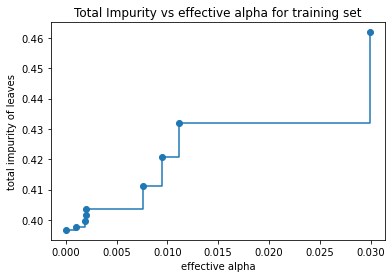

In [175]:
import matplotlib.pyplot as plt

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [176]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.03753189867649004


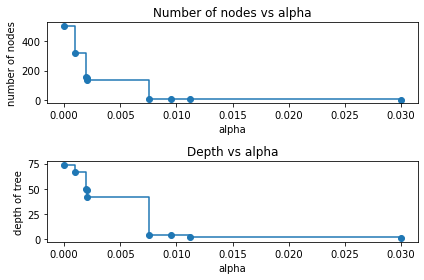

In [177]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

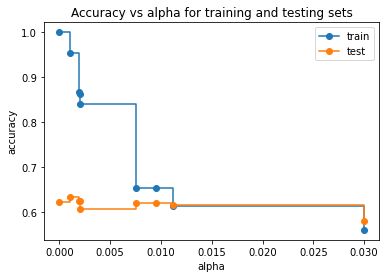

In [178]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

#### Decision tree with bagging

In [124]:
# decision tree with bagging
from sklearn.ensemble import BaggingClassifier

clf = DecisionTreeClassifier(random_state=0)
bag = BaggingClassifier(clf, n_estimators=100, max_samples=0.9, random_state=0)
bag = bag.fit(X_train, y_train)
bag.score(X_test, y_test)

0.625

#### Random forest

In [125]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6330645161290323